# **Optimization of Machine Downtime**

One of the leading vehicle fuel pump manufacturers. These pumps are used to take fuel as input and push fuel as output at a high velocity. More the velocity, more is the speed at which vehicle will move.


Business Problem: Machines which manufacture the pumps. Unplanned machine downtime which is leading to loss of productivity.

Business objective: Minimize unplanned machine downtime.

Business constraint: Minimize maintenance cost.


Business success criteria: Reduce the unplanned downtime by at least 10%

Economic success criteria: Achieve a cost saving of at least $1M"


## Data Manipulation and Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset/Data Collection

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\Datasets\MachineDowntime.csv")

## Exploratory Data Analysis and Data Cleaning

In [3]:
df.shape # no.of rowns and columns

(2500, 16)

In [4]:
df.info() # know data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64
 9   Spindle_Vibration(µm)            2489 non-null   float64
 10  Tool_Vibration(µm)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [5]:
df.head(3) # data structure

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure


In [6]:
#Missing data
df.isnull().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [7]:
df.columns # All columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

In [8]:
print(df.describe().columns) #non object columns

Index(['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)',
       'Air_System_Pressure(bar)', 'Coolant_Temperature',
       'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)',
       'Spindle_Vibration(µm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)',
       'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)'],
      dtype='object')


In [9]:
print(df.describe(include='object')) #object columns

              Date            Machine_ID Assembly_Line_No         Downtime
count         2500                  2500             2500             2500
unique         164                     3                3                2
top     2022-03-15  Makino-L1-Unit1-2013     Shopfloor-L1  Machine_Failure
freq            64                   874              874             1265


In [10]:
df.describe() # statistical summary

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


In [11]:
df['Date']=pd.to_datetime(df['Date'])  
df.info()   # object form  date column should be in datetime format type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             2500 non-null   datetime64[ns]
 1   Machine_ID                       2500 non-null   object        
 2   Assembly_Line_No                 2500 non-null   object        
 3   Hydraulic_Pressure(bar)          2490 non-null   float64       
 4   Coolant_Pressure(bar)            2481 non-null   float64       
 5   Air_System_Pressure(bar)         2483 non-null   float64       
 6   Coolant_Temperature              2488 non-null   float64       
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64       
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64       
 9   Spindle_Vibration(µm)            2489 non-null   float64       
 10  Tool_Vibration(µm)               2489 non-null   float64    

In [12]:
# Eliminate identical rows to avoid redundancy
df_no_duplicates = df.drop_duplicates()
df_no_duplicates.shape # no duplicate or repeated data

(2500, 16)

In [13]:
# Filling missing values 

df['Air_System_Pressure(bar)'].fillna(method='ffill', inplace=True)  
df['Spindle_Bearing_Temperature(°C)'].fillna(method='bfill', inplace=True)  


In [14]:
# Fill missing values in 'Hydraulic_Pressure(bar)' with the *mean*
df['Hydraulic_Pressure(bar)'].fillna(df['Hydraulic_Pressure(bar)'].mean(), inplace=True)

In [15]:
unique_values = df['Downtime'].unique()
print(unique_values)

['Machine_Failure' 'No_Machine_Failure']


In [16]:
# Fill missing values of 'Coolant_Pressure(bar)', with **median** as it is less sensitive to outliers if any
# Calculate the median of the 'Coolant_Pressure(bar)'
median_value = df['Coolant_Pressure(bar)'].median()
df['Coolant_Pressure(bar)'] = df['Coolant_Pressure(bar)'].fillna(df['Coolant_Pressure(bar)'].median())


# Fill missing values with the median of that data where downtime having no machine failure
condition = df['Downtime'] == 'No_Machine_Failure'
median_value = df.loc[condition, 'Coolant_Pressure(bar)'].median()
df.loc[condition, 'Coolant_Pressure(bar)'] = df.loc[condition, 'Coolant_Pressure(bar)'].fillna(median_value)
df

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,2022-02-01,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,2022-02-01,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


In [17]:
#Air_System_Pressure(bar)
mode_value = df.loc[condition, 'Coolant_Temperature'].mode().iloc[0]
df.loc[condition, 'Coolant_Temperature'] = df.loc[condition, 'Coolant_Temperature'].fillna(mode_value)
df

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,2022-02-01,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,2022-02-01,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


In [18]:
df.fillna(method='ffill', inplace=True) #fill data with forward filling

In [19]:
df.isnull().sum() # Data is cleaned 

Date                               0
Machine_ID                         0
Assembly_Line_No                   0
Hydraulic_Pressure(bar)            0
Coolant_Pressure(bar)              0
Air_System_Pressure(bar)           0
Coolant_Temperature                0
Hydraulic_Oil_Temperature(°C)      0
Spindle_Bearing_Temperature(°C)    0
Spindle_Vibration(µm)              0
Tool_Vibration(µm)                 0
Spindle_Speed(RPM)                 0
Voltage(volts)                     0
Torque(Nm)                         0
Cutting(kN)                        0
Downtime                           0
dtype: int64

### Visualize Data Distribution

In [20]:
downtime_percent=df['Downtime'].value_counts(normalize=True)
print(downtime_percent)

Machine_Failure       0.506
No_Machine_Failure    0.494
Name: Downtime, dtype: float64


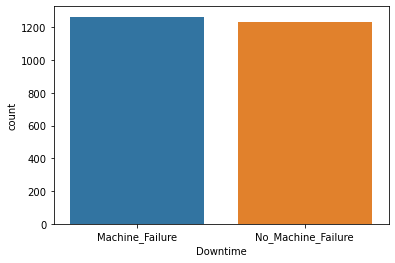

In [21]:
sns.countplot(x='Downtime', data=df)
plt.show() # machine failure is more in number compared to Smooth running count


<AxesSubplot:>

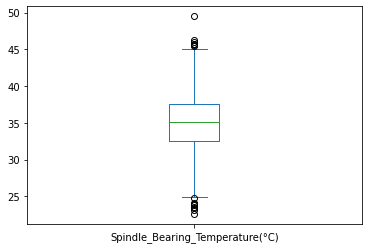

In [22]:
#graph to see outliers
df['Spindle_Bearing_Temperature(°C)'].plot(kind='box')

In [23]:
# removing outliers 
df = df[(df['Spindle_Bearing_Temperature(°C)'] < 40) & (df['Spindle_Bearing_Temperature(°C)'] > 25)]

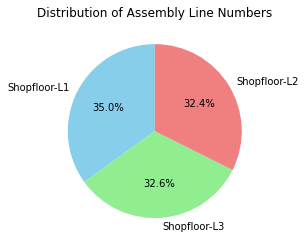

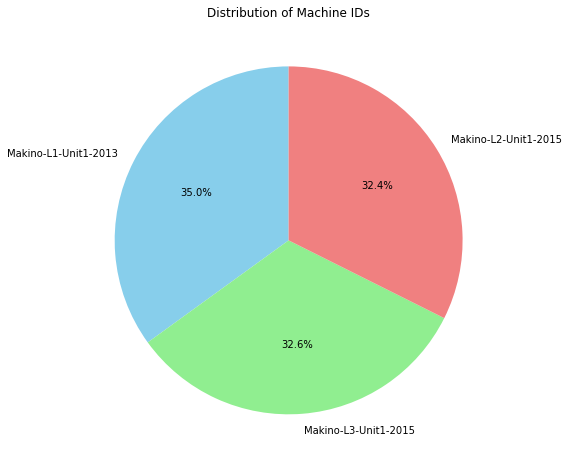

In [24]:
# Pie chart for Assembly_Line_No
plt.figure(figsize=(12, 4))
plt.pie(df['Assembly_Line_No'].value_counts(), labels=df['Assembly_Line_No'].unique(), autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Assembly Line Numbers')
plt.show()

# Pie chart for Machine_ID
plt.figure(figsize=(8, 8))
plt.pie(df['Machine_ID'].value_counts(), labels=df['Machine_ID'].unique(), autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Machine IDs')
plt.show()


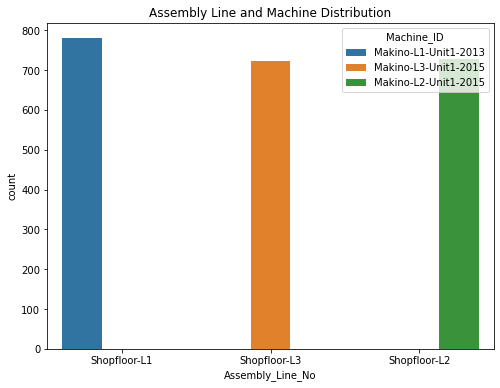

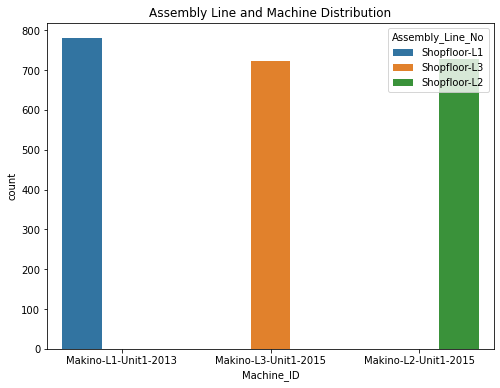

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Assembly_Line_No', hue='Machine_ID', data=df)
plt.title('Assembly Line and Machine Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(hue='Assembly_Line_No', x='Machine_ID', data=df)
plt.title('Assembly Line and Machine Distribution')
plt.show()

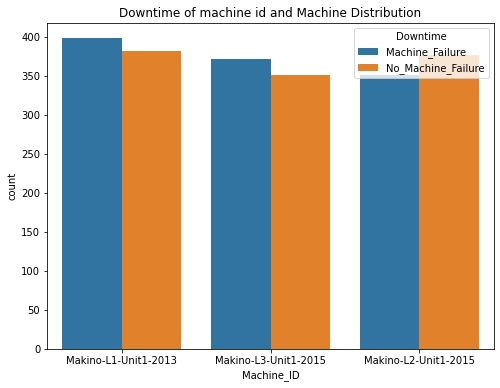

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(hue='Downtime', x='Machine_ID', data=df)
plt.title('Downtime of machine id and Machine Distribution')
plt.show()

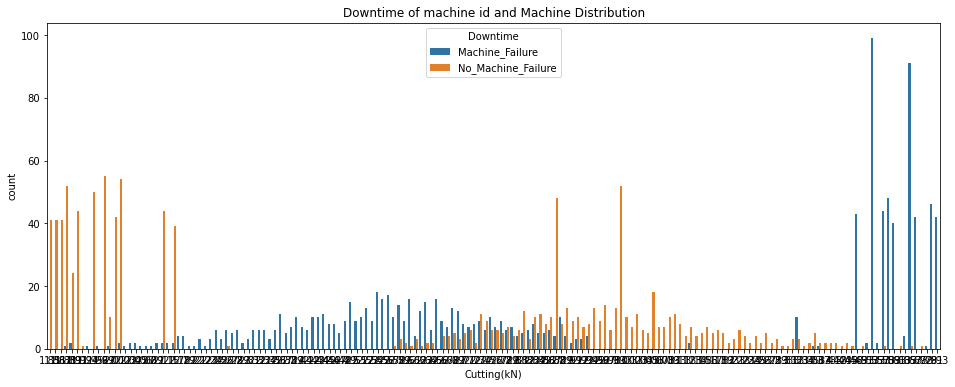

In [27]:
plt.figure(figsize=(16, 6))
sns.countplot(hue='Downtime', x='Cutting(kN)', data=df)
plt.title('Downtime of machine id and Machine Distribution')
plt.show()

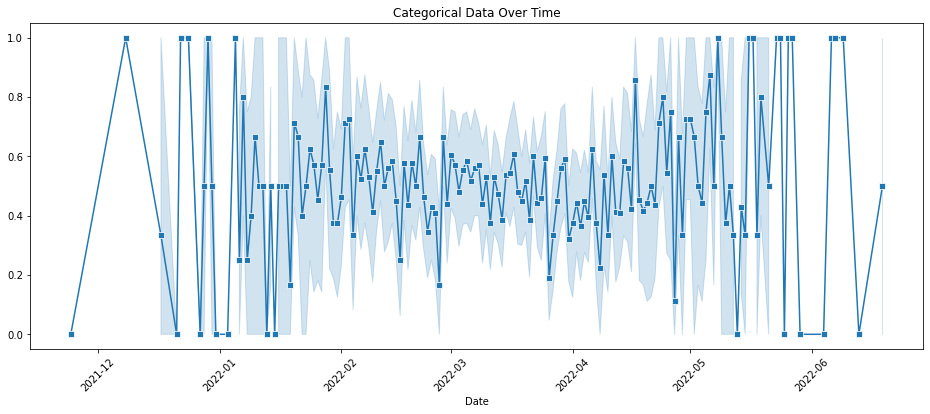

In [28]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='Date', y=df['Downtime'].astype('category').cat.codes, data=df, marker='s')
plt.xticks(rotation=45)
plt.title('Categorical Data Over Time')
plt.show()

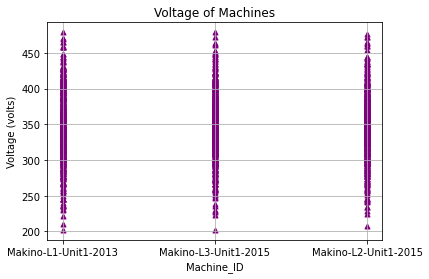

In [29]:
plt.scatter(df['Machine_ID'], df['Voltage(volts)'], color='purple', marker='^', s=25)  
plt.title('Voltage of Machines')
plt.xlabel('Machine_ID')
plt.ylabel('Voltage (volts)')
plt.grid(True)
plt.show()

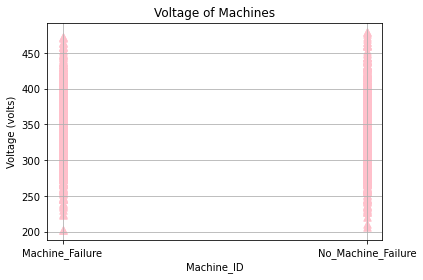

In [30]:
plt.scatter(df['Downtime'], df['Voltage(volts)'], color='pink', marker='^', s=55)  
plt.title('Voltage of Machines')
plt.xlabel('Machine_ID')
plt.ylabel('Voltage (volts)')
plt.grid(True)
plt.show()

### Correlation Analysis

In [31]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

In [32]:
# Display the correlation matrix
correlation_matrix

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
Hydraulic_Pressure(bar),1.000000,-0.071280,-0.027496,-0.119984,0.003114,0.027849,-0.002365,0.024354,-0.111510,0.012770,0.169418,-0.232903
Coolant_Pressure(bar),-0.071280,1.000000,-0.028576,0.005603,0.008173,0.004477,0.007402,-0.006699,0.068691,0.028904,-0.102303,0.167873
Air_System_Pressure(bar),-0.027496,-0.028576,1.000000,0.053561,-0.013528,0.012816,-0.001831,0.049594,0.007332,0.023667,0.012161,-0.001552
Coolant_Temperature,-0.119984,0.005603,0.053561,1.000000,-0.000133,-0.004321,0.014767,0.002718,0.078780,0.013814,-0.072583,0.097885
Hydraulic_Oil_Temperature(°C),0.003114,0.008173,-0.013528,-0.000133,1.000000,0.015708,-0.011280,-0.019409,0.008410,0.036720,-0.014185,-0.014885
Spindle_Bearing_Temperature(°C),0.027849,0.004477,0.012816,-0.004321,0.015708,1.000000,-0.026243,-0.004683,-0.000010,0.008139,0.022460,-0.022126
Spindle_Vibration(µm),-0.002365,0.007402,-0.001831,0.014767,-0.011280,-0.026243,1.000000,-0.018266,0.016972,0.011561,0.026583,-0.025393
Tool_Vibration(µm),0.024354,-0.006699,0.049594,0.002718,-0.019409,-0.004683,-0.018266,1.000000,0.010997,0.024843,-0.016043,-0.042691
Spindle_Speed(RPM),-0.111510,0.068691,0.007332,0.078780,0.008410,-0.000010,0.016972,0.010997,1.000000,-0.039184,-0.188248,0.221125
Voltage(volts),0.012770,0.028904,0.023667,0.013814,0.036720,0.008139,0.011561,0.024843,-0.039184,1.000000,0.007778,-0.038612


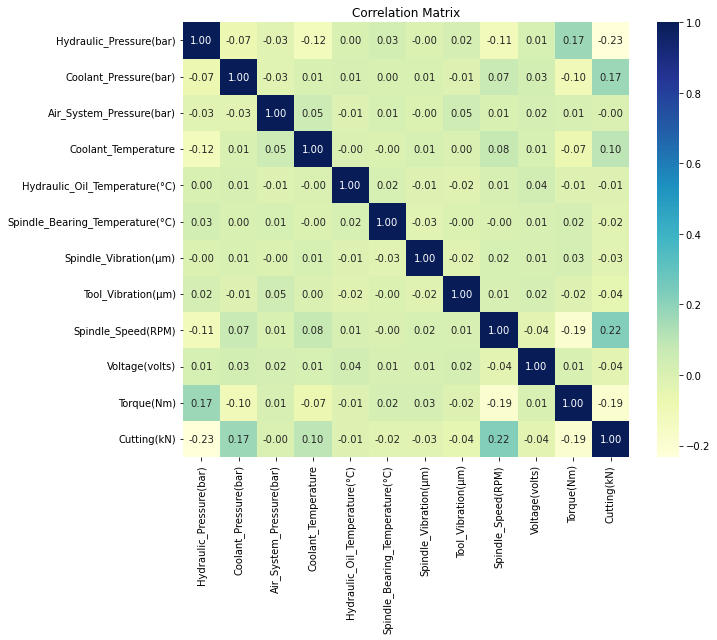

In [33]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

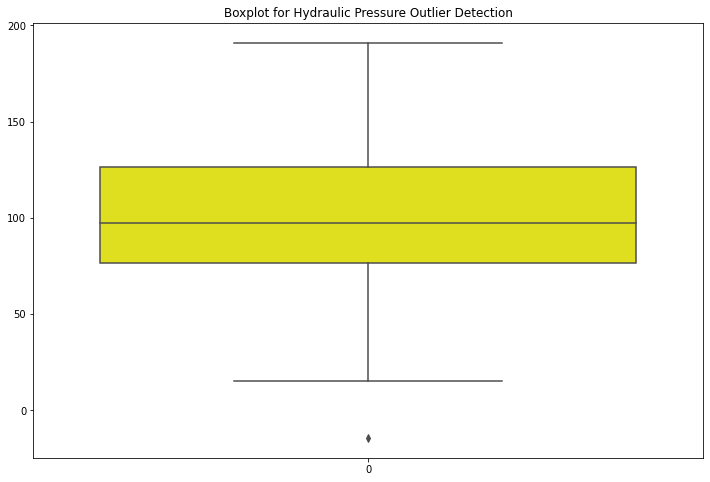

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df['Hydraulic_Pressure(bar)'],color='yellow')
plt.title('Boxplot for Hydraulic Pressure Outlier Detection')
plt.show()

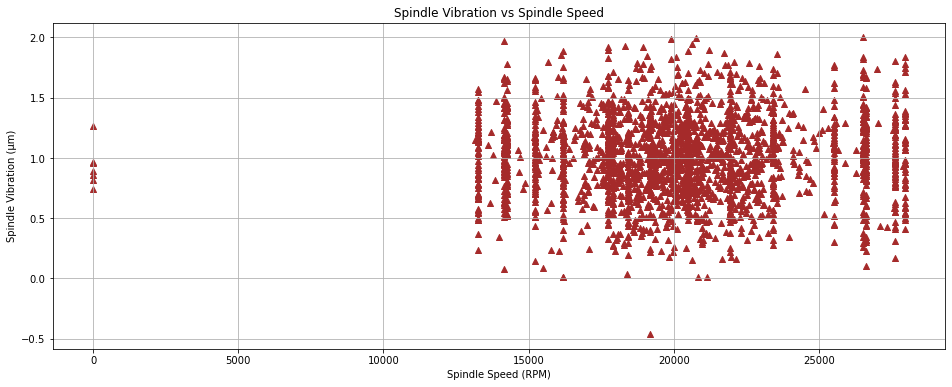

In [35]:

# Create a scatter plot
plt.figure(figsize=(16, 6))
plt.scatter(df['Spindle_Speed(RPM)'],df['Spindle_Vibration(µm)'] , color='brown', marker='^')
plt.xlabel('Spindle Speed (RPM)')
plt.ylabel('Spindle Vibration (µm)')
plt.title('Spindle Vibration vs Spindle Speed')
plt.grid(True)
plt.show()


###### The machine needed regular maintenance and skilled labour to operate it.  We have to maintain favourable parameters like volts temperature and others during the machine operations such that we can achieve great output as machine downtime will be automatically reduced.